### Deliverable 1: Preprocessing the Data for a Neural Network

In [112]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()
from tensorflow.keras.callbacks import ModelCheckpoint
import os

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [113]:
# function to check overlap:
#def sharedperc(success, feature):
#    for i in range(len(success)):
        

In [114]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns= ['EIN','NAME','SPECIAL_CONSIDERATIONS','ASK_AMT'], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,1


In [115]:
# Determine the number of unique values in each column.
application_list = application_df.dtypes[application_df.dtypes != "NULL"].index.tolist()
application_df[application_list].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
STATUS               2
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [116]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

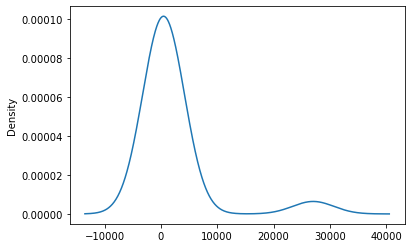

In [117]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [118]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [119]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

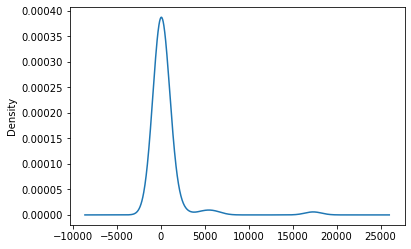

In [120]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [121]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_counts[classification_counts < 300].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [122]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [123]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [124]:
#merged_col = merged_df.columns.values.tolist()
#print(merged_col)

In [125]:
# Merge one-hot encoded features and drop the originals
temp_to_merge_df= pd.DataFrame().assign(STATUS=application_df['STATUS'], 
                                        IS_SUCCESSFUL=application_df['IS_SUCCESSFUL'])
merged_df = pd.concat([temp_to_merge_df, encode_df], axis=1, join='inner')
merged_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [126]:
merged_col = merged_df.columns.values.tolist()
print(merged_col)

['STATUS', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent', 'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev', 'ORGANIZATION_Association', 'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M']


In [127]:
coltodrop = []
for column in merged_col:
    #dataxtab = pd.crosstab(merged_df[column],merged_df['IS_SUCCESSFUL'],margins = False)
    #print(dataxtab)
    #dataxtab.plot.bar(stacked=True)
    #plt.legend(title='IS_SUCCESSFUL')
    #plt.show()
    #dataxtab = pd.crosstab(merged_df[column],merged_df['IS_SUCCESSFUL'],margins = False, normalize = 'index')
    #print(dataxtab)
    corrr = np.corrcoef(merged_df[column],merged_df['IS_SUCCESSFUL'])
    corrrr = abs(corrr[1,0])
    if corrrr < .01:
        #print(corrrr)
        coltodrop.append(column)
print(coltodrop)
coltodrop.append('IS_SUCCESSFUL')

['STATUS', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T7', 'AFFILIATION_Family/Parent', 'AFFILIATION_National', 'AFFILIATION_Regional', 'CLASSIFICATION_C2000', 'USE_CASE_Other', 'INCOME_AMT_5M-10M']


In [128]:
# Kill the noise
for col in coltodrop:
    merged_df.drop([col],1).values

In [129]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [130]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Refinement of the Model

In [132]:
activation_list = ['relu','tanh']
value_list = range(30,100,10)
r_value_list = range(60,130,10)
number_input_features = len(X_train[0])
class bestest_model:
    model_accuracy = 0
    neuron_array = []
    activation_array = []
    layer_count = len(neuron_array)
for layer1 in r_value_list:
    for layer2 in value_list:
        for layer3 in value_list:
            for act1 in activation_list:
                for act2 in activation_list:
                    for act3 in activation_list:
                        temp_neuron_array = []
                        temp_activation_array = []
                        temp_neuron_array.append(layer1)
                        temp_activation_array.append(act1)
                        temp_neuron_array.append(layer2)
                        temp_activation_array.append(act2)
                        temp_neuron_array.append(layer3)
                        temp_activation_array.append(act3)
                        nn = tf.keras.models.Sequential()
                        nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=act1))
                        nn.add(tf.keras.layers.Dense(units=layer2, activation=act2))
                        nn.add(tf.keras.layers.Dense(units=layer3, activation=act3))
                        nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
                        nn.summary()
                        nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
                        fit_model = nn.fit(X_train,y_train,epochs=10,verbose=0)
                        model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
                        print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
                        if model_accuracy > bestest_model.model_accuracy:
                            bestest_model.neuron_array = temp_neuron_array
                            bestest_model.activation_array = temp_activation_array
                            bestest_model.model_accuracy = model_accuracy
                            bestest_model.layer_count = len(bestest_model.neuron_array)
                            print("new best model")
                        else:
                            print("Oh bother")
                        print('*'*75)
                        if model_accuracy > .75:
                            break
                    if model_accuracy > .75:
                        break
                if model_accuracy > .75:
                    break
            if model_accuracy > .75:
                break
        if model_accuracy > .75:
            break
    if model_accuracy > .75:
        break
def display_model_stats (model):
    print(model.neuron_array)
    print(model.activation_array)
    print(model.model_accuracy)
    print(model.layer_count)
print("best model stats:")
display_model_stats(bestest_model)
# print("second best model stats:")
# display_model_stats(second_best)
# print("third best model stats:")
# display_model_stats(third_best)

Model: "sequential_3580"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14474 (Dense)         (None, 90)                3780      
                                                                 
 dense_14475 (Dense)         (None, 30)                2730      
                                                                 
 dense_14476 (Dense)         (None, 30)                930       
                                                                 
 dense_14477 (Dense)         (None, 1)                 31        
                                                                 
Total params: 7,471
Trainable params: 7,471
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6971 - accuracy: 0.7114 - 262ms/epoch - 979us/step
Loss: 0.6971374154090881, Accuracy: 0.7113702893257141
new best model
*************************************

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14502 (Dense)         (None, 90)                3780      
                                                                 
 dense_14503 (Dense)         (None, 30)                2730      
                                                                 
 dense_14504 (Dense)         (None, 30)                930       
                                                                 
 dense_14505 (Dense)         (None, 1)                 31        
                                                                 
Total params: 7,471
Trainable params: 7,471
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6208 - accuracy: 0.7236 - 286ms/epoch - 1ms/step
Loss: 0.6208033561706543, Accuracy: 0.7236151695251465
Oh bother
*********************************************************************

 Layer (type)                Output Shape              Param #   
 dense_14530 (Dense)         (None, 90)                3780      
                                                                 
 dense_14531 (Dense)         (None, 30)                2730      
                                                                 
 dense_14532 (Dense)         (None, 40)                1240      
                                                                 
 dense_14533 (Dense)         (None, 1)                 41        
                                                                 
Total params: 7,791
Trainable params: 7,791
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5943 - accuracy: 0.7113 - 270ms/epoch - 1ms/step
Loss: 0.5942932963371277, Accuracy: 0.7112536430358887
Oh bother
***************************************************************************
Model: "sequential_3595"
__________________________________

 dense_14558 (Dense)         (None, 90)                3780      
                                                                 
 dense_14559 (Dense)         (None, 30)                2730      
                                                                 
 dense_14560 (Dense)         (None, 50)                1550      
                                                                 
 dense_14561 (Dense)         (None, 1)                 51        
                                                                 
Total params: 8,111
Trainable params: 8,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7311 - accuracy: 0.6973 - 257ms/epoch - 959us/step
Loss: 0.731055736541748, Accuracy: 0.6972594857215881
Oh bother
***************************************************************************
Model: "sequential_3602"
_________________________________________________________________
 Layer (type)                Outp

 dense_14586 (Dense)         (None, 90)                3780      
                                                                 
 dense_14587 (Dense)         (None, 30)                2730      
                                                                 
 dense_14588 (Dense)         (None, 60)                1860      
                                                                 
 dense_14589 (Dense)         (None, 1)                 61        
                                                                 
Total params: 8,431
Trainable params: 8,431
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6421 - accuracy: 0.6826 - 258ms/epoch - 964us/step
Loss: 0.642093300819397, Accuracy: 0.6825655698776245
Oh bother
***************************************************************************
Model: "sequential_3609"
_________________________________________________________________
 Layer (type)                Outp

                                                                 
 dense_14615 (Dense)         (None, 30)                2730      
                                                                 
 dense_14616 (Dense)         (None, 70)                2170      
                                                                 
 dense_14617 (Dense)         (None, 1)                 71        
                                                                 
Total params: 8,751
Trainable params: 8,751
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6724 - accuracy: 0.7033 - 257ms/epoch - 960us/step
Loss: 0.6724221110343933, Accuracy: 0.7033236026763916
Oh bother
***************************************************************************
Model: "sequential_3616"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14618 (Dense)         (No

 dense_14643 (Dense)         (None, 30)                2730      
                                                                 
 dense_14644 (Dense)         (None, 80)                2480      
                                                                 
 dense_14645 (Dense)         (None, 1)                 81        
                                                                 
Total params: 9,071
Trainable params: 9,071
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6317 - accuracy: 0.7064 - 252ms/epoch - 942us/step
Loss: 0.6317163109779358, Accuracy: 0.7063556909561157
Oh bother
***************************************************************************
Model: "sequential_3623"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14646 (Dense)         (None, 90)                3780      
                                

                                                                 
 dense_14672 (Dense)         (None, 30)                1230      
                                                                 
 dense_14673 (Dense)         (None, 1)                 31        
                                                                 
Total params: 8,681
Trainable params: 8,681
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6269 - accuracy: 0.7210 - 256ms/epoch - 956us/step
Loss: 0.6269400715827942, Accuracy: 0.7210495471954346
Oh bother
***************************************************************************
Model: "sequential_3630"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14674 (Dense)         (None, 90)                3780      
                                                                 
 dense_14675 (Dense)         (No

 dense_14700 (Dense)         (None, 40)                1640      
                                                                 
 dense_14701 (Dense)         (None, 1)                 41        
                                                                 
Total params: 9,101
Trainable params: 9,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6974 - accuracy: 0.6942 - 253ms/epoch - 945us/step
Loss: 0.6974362134933472, Accuracy: 0.694227397441864
Oh bother
***************************************************************************
Model: "sequential_3637"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14702 (Dense)         (None, 90)                3780      
                                                                 
 dense_14703 (Dense)         (None, 40)                3640      
                                 

                                                                 
 dense_14729 (Dense)         (None, 1)                 41        
                                                                 
Total params: 9,101
Trainable params: 9,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5993 - accuracy: 0.7217 - 263ms/epoch - 980us/step
Loss: 0.5992818474769592, Accuracy: 0.7217492461204529
Oh bother
***************************************************************************
Model: "sequential_3644"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14730 (Dense)         (None, 90)                3780      
                                                                 
 dense_14731 (Dense)         (None, 40)                3640      
                                                                 
 dense_14732 (Dense)         (No

 dense_14757 (Dense)         (None, 1)                 51        
                                                                 
Total params: 9,521
Trainable params: 9,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6419 - accuracy: 0.6967 - 289ms/epoch - 1ms/step
Loss: 0.6419273614883423, Accuracy: 0.6966763734817505
Oh bother
***************************************************************************
Model: "sequential_3651"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14758 (Dense)         (None, 90)                3780      
                                                                 
 dense_14759 (Dense)         (None, 40)                3640      
                                                                 
 dense_14760 (Dense)         (None, 50)                2050      
                                  

                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6811 - accuracy: 0.7236 - 254ms/epoch - 949us/step
Loss: 0.6810803413391113, Accuracy: 0.7236151695251465
Oh bother
***************************************************************************
Model: "sequential_3658"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14786 (Dense)         (None, 90)                3780      
                                                                 
 dense_14787 (Dense)         (None, 40)                3640      
                                                                 
 dense_14788 (Dense)         (None, 60)                2460      
                                                                 
 dense_14789 (Dense)         (No

Total params: 10,361
Trainable params: 10,361
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6141 - accuracy: 0.7111 - 268ms/epoch - 1ms/step
Loss: 0.6140929460525513, Accuracy: 0.7111369967460632
Oh bother
***************************************************************************
Model: "sequential_3665"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14814 (Dense)         (None, 90)                3780      
                                                                 
 dense_14815 (Dense)         (None, 40)                3640      
                                                                 
 dense_14816 (Dense)         (None, 70)                2870      
                                                                 
 dense_14817 (Dense)         (None, 1)                 71        
                                

Total params: 10,781
Trainable params: 10,781
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6684 - accuracy: 0.6755 - 282ms/epoch - 1ms/step
Loss: 0.6684081554412842, Accuracy: 0.6754518747329712
Oh bother
***************************************************************************
Model: "sequential_3672"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14842 (Dense)         (None, 90)                3780      
                                                                 
 dense_14843 (Dense)         (None, 40)                3640      
                                                                 
 dense_14844 (Dense)         (None, 80)                3280      
                                                                 
 dense_14845 (Dense)         (None, 1)                 81        
                                

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6503 - accuracy: 0.7300 - 261ms/epoch - 975us/step
Loss: 0.6502625346183777, Accuracy: 0.7300291657447815
Oh bother
***************************************************************************
Model: "sequential_3679"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14870 (Dense)         (None, 90)                3780      
                                                                 
 dense_14871 (Dense)         (None, 50)                4550      
                                                                 
 dense_14872 (Dense)         (None, 30)                1530      
                                                                 
 dense_14873 (Dense)         (None, 1)                 31        
                                                                 
Total para

268/268 - 0s - loss: 0.6164 - accuracy: 0.7143 - 269ms/epoch - 1ms/step
Loss: 0.6164186000823975, Accuracy: 0.7142857313156128
Oh bother
***************************************************************************
Model: "sequential_3686"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14898 (Dense)         (None, 90)                3780      
                                                                 
 dense_14899 (Dense)         (None, 50)                4550      
                                                                 
 dense_14900 (Dense)         (None, 40)                2040      
                                                                 
 dense_14901 (Dense)         (None, 1)                 41        
                                                                 
Total params: 10,411
Trainable params: 10,411
Non-trainable params: 0
________________________________

Loss: 0.7148717641830444, Accuracy: 0.707055389881134
Oh bother
***************************************************************************
Model: "sequential_3693"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14926 (Dense)         (None, 90)                3780      
                                                                 
 dense_14927 (Dense)         (None, 50)                4550      
                                                                 
 dense_14928 (Dense)         (None, 50)                2550      
                                                                 
 dense_14929 (Dense)         (None, 1)                 51        
                                                                 
Total params: 10,931
Trainable params: 10,931
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6508 - accuracy:

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14954 (Dense)         (None, 90)                3780      
                                                                 
 dense_14955 (Dense)         (None, 50)                4550      
                                                                 
 dense_14956 (Dense)         (None, 60)                3060      
                                                                 
 dense_14957 (Dense)         (None, 1)                 61        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7418 - accuracy: 0.7148 - 269ms/epoch - 1ms/step
Loss: 0.7418387532234192, Accuracy: 0.714752197265625
Oh bother
********************************************************************

 Layer (type)                Output Shape              Param #   
 dense_14982 (Dense)         (None, 90)                3780      
                                                                 
 dense_14983 (Dense)         (None, 50)                4550      
                                                                 
 dense_14984 (Dense)         (None, 60)                3060      
                                                                 
 dense_14985 (Dense)         (None, 1)                 61        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6139 - accuracy: 0.7184 - 295ms/epoch - 1ms/step
Loss: 0.6138734221458435, Accuracy: 0.718367338180542
Oh bother
***************************************************************************
Model: "sequential_3708"
_________________________________

 dense_15010 (Dense)         (None, 90)                3780      
                                                                 
 dense_15011 (Dense)         (None, 50)                4550      
                                                                 
 dense_15012 (Dense)         (None, 70)                3570      
                                                                 
 dense_15013 (Dense)         (None, 1)                 71        
                                                                 
Total params: 11,971
Trainable params: 11,971
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6181 - accuracy: 0.7061 - 322ms/epoch - 1ms/step
Loss: 0.6180540919303894, Accuracy: 0.7061224579811096
Oh bother
***************************************************************************
Model: "sequential_3715"
_________________________________________________________________
 Layer (type)                Out

 dense_15038 (Dense)         (None, 90)                3780      
                                                                 
 dense_15039 (Dense)         (None, 50)                4550      
                                                                 
 dense_15040 (Dense)         (None, 80)                4080      
                                                                 
 dense_15041 (Dense)         (None, 1)                 81        
                                                                 
Total params: 12,491
Trainable params: 12,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6572 - accuracy: 0.6517 - 306ms/epoch - 1ms/step
Loss: 0.6572170853614807, Accuracy: 0.6516618132591248
Oh bother
***************************************************************************
Model: "sequential_3722"
_________________________________________________________________
 Layer (type)                Out

                                                                 
 dense_15067 (Dense)         (None, 60)                5460      
                                                                 
 dense_15068 (Dense)         (None, 30)                1830      
                                                                 
 dense_15069 (Dense)         (None, 1)                 31        
                                                                 
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6572 - accuracy: 0.7040 - 268ms/epoch - 1ms/step
Loss: 0.6571789383888245, Accuracy: 0.7040233016014099
Oh bother
***************************************************************************
Model: "sequential_3729"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15070 (Dense)         (No

 dense_15095 (Dense)         (None, 60)                5460      
                                                                 
 dense_15096 (Dense)         (None, 40)                2440      
                                                                 
 dense_15097 (Dense)         (None, 1)                 41        
                                                                 
Total params: 11,721
Trainable params: 11,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6997 - accuracy: 0.6651 - 271ms/epoch - 1ms/step
Loss: 0.6996818780899048, Accuracy: 0.6650728583335876
Oh bother
***************************************************************************
Model: "sequential_3736"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15098 (Dense)         (None, 90)                3780      
                                

                                                                 
 dense_15124 (Dense)         (None, 50)                3050      
                                                                 
 dense_15125 (Dense)         (None, 1)                 51        
                                                                 
Total params: 12,341
Trainable params: 12,341
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6664 - accuracy: 0.7134 - 357ms/epoch - 1ms/step
Loss: 0.666384220123291, Accuracy: 0.7133527994155884
Oh bother
***************************************************************************
Model: "sequential_3743"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15126 (Dense)         (None, 90)                3780      
                                                                 
 dense_15127 (Dense)         (Non

 dense_15152 (Dense)         (None, 60)                3660      
                                                                 
 dense_15153 (Dense)         (None, 1)                 61        
                                                                 
Total params: 12,961
Trainable params: 12,961
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7315 - accuracy: 0.7192 - 265ms/epoch - 990us/step
Loss: 0.7315014600753784, Accuracy: 0.7191836833953857
Oh bother
***************************************************************************
Model: "sequential_3750"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15154 (Dense)         (None, 90)                3780      
                                                                 
 dense_15155 (Dense)         (None, 60)                5460      
                              

                                                                 
 dense_15181 (Dense)         (None, 1)                 71        
                                                                 
Total params: 13,581
Trainable params: 13,581
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8060 - accuracy: 0.6724 - 260ms/epoch - 971us/step
Loss: 0.8059670925140381, Accuracy: 0.6724198460578918
Oh bother
***************************************************************************
Model: "sequential_3757"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15182 (Dense)         (None, 90)                3780      
                                                                 
 dense_15183 (Dense)         (None, 60)                5460      
                                                                 
 dense_15184 (Dense)         (

 dense_15209 (Dense)         (None, 1)                 71        
                                                                 
Total params: 13,581
Trainable params: 13,581
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5968 - accuracy: 0.7038 - 260ms/epoch - 971us/step
Loss: 0.5967616438865662, Accuracy: 0.7037900686264038
Oh bother
***************************************************************************
Model: "sequential_3764"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15210 (Dense)         (None, 90)                3780      
                                                                 
 dense_15211 (Dense)         (None, 60)                5460      
                                                                 
 dense_15212 (Dense)         (None, 80)                4880      
                              

                                                                 
Total params: 14,201
Trainable params: 14,201
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6111 - accuracy: 0.7017 - 256ms/epoch - 956us/step
Loss: 0.611148476600647, Accuracy: 0.7016909718513489
Oh bother
***************************************************************************
Model: "sequential_3771"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15238 (Dense)         (None, 90)                3780      
                                                                 
 dense_15239 (Dense)         (None, 60)                5460      
                                                                 
 dense_15240 (Dense)         (None, 80)                4880      
                                                                 
 dense_15241 (Dense)         (N

Total params: 12,311
Trainable params: 12,311
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6244 - accuracy: 0.7025 - 250ms/epoch - 935us/step
Loss: 0.6243668794631958, Accuracy: 0.7025073170661926
Oh bother
***************************************************************************
Model: "sequential_3778"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15266 (Dense)         (None, 90)                3780      
                                                                 
 dense_15267 (Dense)         (None, 70)                6370      
                                                                 
 dense_15268 (Dense)         (None, 30)                2130      
                                                                 
 dense_15269 (Dense)         (None, 1)                 31        
                              

Total params: 13,031
Trainable params: 13,031
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6230 - accuracy: 0.7208 - 268ms/epoch - 1ms/step
Loss: 0.6230024695396423, Accuracy: 0.7208163142204285
Oh bother
***************************************************************************
Model: "sequential_3785"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15294 (Dense)         (None, 90)                3780      
                                                                 
 dense_15295 (Dense)         (None, 70)                6370      
                                                                 
 dense_15296 (Dense)         (None, 40)                2840      
                                                                 
 dense_15297 (Dense)         (None, 1)                 41        
                                

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6446 - accuracy: 0.6931 - 304ms/epoch - 1ms/step
Loss: 0.6445752382278442, Accuracy: 0.6930612325668335
Oh bother
***************************************************************************
Model: "sequential_3792"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15322 (Dense)         (None, 90)                3780      
                                                                 
 dense_15323 (Dense)         (None, 70)                6370      
                                                                 
 dense_15324 (Dense)         (None, 50)                3550      
                                                                 
 dense_15325 (Dense)         (None, 1)                 51        
                                                                 
Total params

268/268 - 0s - loss: 0.6780 - accuracy: 0.7209 - 264ms/epoch - 986us/step
Loss: 0.6779568791389465, Accuracy: 0.7209329605102539
Oh bother
***************************************************************************
Model: "sequential_3799"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15350 (Dense)         (None, 90)                3780      
                                                                 
 dense_15351 (Dense)         (None, 70)                6370      
                                                                 
 dense_15352 (Dense)         (None, 60)                4260      
                                                                 
 dense_15353 (Dense)         (None, 1)                 61        
                                                                 
Total params: 14,471
Trainable params: 14,471
Non-trainable params: 0
______________________________

Loss: 0.666847288608551, Accuracy: 0.7267638444900513
Oh bother
***************************************************************************
Model: "sequential_3806"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15378 (Dense)         (None, 90)                3780      
                                                                 
 dense_15379 (Dense)         (None, 70)                6370      
                                                                 
 dense_15380 (Dense)         (None, 70)                4970      
                                                                 
 dense_15381 (Dense)         (None, 1)                 71        
                                                                 
Total params: 15,191
Trainable params: 15,191
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6258 - accuracy:

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15406 (Dense)         (None, 90)                3780      
                                                                 
 dense_15407 (Dense)         (None, 70)                6370      
                                                                 
 dense_15408 (Dense)         (None, 80)                5680      
                                                                 
 dense_15409 (Dense)         (None, 1)                 81        
                                                                 
Total params: 15,911
Trainable params: 15,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6938 - accuracy: 0.7243 - 304ms/epoch - 1ms/step
Loss: 0.6937856674194336, Accuracy: 0.7243148684501648
Oh bother
*******************************************************************

 Layer (type)                Output Shape              Param #   
 dense_15434 (Dense)         (None, 90)                3780      
                                                                 
 dense_15435 (Dense)         (None, 80)                7280      
                                                                 
 dense_15436 (Dense)         (None, 30)                2430      
                                                                 
 dense_15437 (Dense)         (None, 1)                 31        
                                                                 
Total params: 13,521
Trainable params: 13,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6811 - accuracy: 0.7254 - 265ms/epoch - 990us/step
Loss: 0.6811417937278748, Accuracy: 0.7253644466400146
Oh bother
***************************************************************************
Model: "sequential_3821"
______________________________

 dense_15462 (Dense)         (None, 90)                3780      
                                                                 
 dense_15463 (Dense)         (None, 80)                7280      
                                                                 
 dense_15464 (Dense)         (None, 30)                2430      
                                                                 
 dense_15465 (Dense)         (None, 1)                 31        
                                                                 
Total params: 13,521
Trainable params: 13,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6544 - accuracy: 0.7208 - 274ms/epoch - 1ms/step
Loss: 0.6544206142425537, Accuracy: 0.7208163142204285
Oh bother
***************************************************************************
Model: "sequential_3828"
_________________________________________________________________
 Layer (type)                Out

 dense_15490 (Dense)         (None, 90)                3780      
                                                                 
 dense_15491 (Dense)         (None, 80)                7280      
                                                                 
 dense_15492 (Dense)         (None, 40)                3240      
                                                                 
 dense_15493 (Dense)         (None, 1)                 41        
                                                                 
Total params: 14,341
Trainable params: 14,341
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6132 - accuracy: 0.7235 - 270ms/epoch - 1ms/step
Loss: 0.6131910085678101, Accuracy: 0.723498523235321
Oh bother
***************************************************************************
Model: "sequential_3835"
_________________________________________________________________
 Layer (type)                Outp

                                                                 
 dense_15519 (Dense)         (None, 80)                7280      
                                                                 
 dense_15520 (Dense)         (None, 50)                4050      
                                                                 
 dense_15521 (Dense)         (None, 1)                 51        
                                                                 
Total params: 15,161
Trainable params: 15,161
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6723 - accuracy: 0.7052 - 272ms/epoch - 1ms/step
Loss: 0.6722550988197327, Accuracy: 0.7051895260810852
Oh bother
***************************************************************************
Model: "sequential_3842"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15522 (Dense)         (No

 dense_15547 (Dense)         (None, 80)                7280      
                                                                 
 dense_15548 (Dense)         (None, 60)                4860      
                                                                 
 dense_15549 (Dense)         (None, 1)                 61        
                                                                 
Total params: 15,981
Trainable params: 15,981
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6575 - accuracy: 0.7262 - 270ms/epoch - 1ms/step
Loss: 0.6574944853782654, Accuracy: 0.7261807322502136
Oh bother
***************************************************************************
Model: "sequential_3849"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15550 (Dense)         (None, 90)                3780      
                                

                                                                 
 dense_15576 (Dense)         (None, 70)                5670      
                                                                 
 dense_15577 (Dense)         (None, 1)                 71        
                                                                 
Total params: 16,801
Trainable params: 16,801
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6141 - accuracy: 0.7266 - 262ms/epoch - 979us/step
Loss: 0.6141418814659119, Accuracy: 0.7266472578048706
Oh bother
***************************************************************************
Model: "sequential_3856"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15578 (Dense)         (None, 90)                3780      
                                                                 
 dense_15579 (Dense)         (

 dense_15604 (Dense)         (None, 80)                6480      
                                                                 
 dense_15605 (Dense)         (None, 1)                 81        
                                                                 
Total params: 17,621
Trainable params: 17,621
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6911 - accuracy: 0.7069 - 251ms/epoch - 938us/step
Loss: 0.6911050081253052, Accuracy: 0.7069388031959534
Oh bother
***************************************************************************
Model: "sequential_3863"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15606 (Dense)         (None, 90)                3780      
                                                                 
 dense_15607 (Dense)         (None, 80)                7280      
                              

                                                                 
 dense_15633 (Dense)         (None, 1)                 31        
                                                                 
Total params: 8,191
Trainable params: 8,191
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6926 - accuracy: 0.7016 - 255ms/epoch - 953us/step
Loss: 0.6925743222236633, Accuracy: 0.7015743255615234
Oh bother
***************************************************************************
Model: "sequential_3870"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15634 (Dense)         (None, 100)               4200      
                                                                 
 dense_15635 (Dense)         (None, 30)                3030      
                                                                 
 dense_15636 (Dense)         (No

 dense_15661 (Dense)         (None, 1)                 41        
                                                                 
Total params: 8,511
Trainable params: 8,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7121 - accuracy: 0.7132 - 271ms/epoch - 1ms/step
Loss: 0.7121003866195679, Accuracy: 0.7132361531257629
Oh bother
***************************************************************************
Model: "sequential_3877"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15662 (Dense)         (None, 100)               4200      
                                                                 
 dense_15663 (Dense)         (None, 30)                3030      
                                                                 
 dense_15664 (Dense)         (None, 40)                1240      
                                  

                                                                 
Total params: 8,511
Trainable params: 8,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6191 - accuracy: 0.7203 - 279ms/epoch - 1ms/step
Loss: 0.6191427111625671, Accuracy: 0.7203498482704163
Oh bother
***************************************************************************
Model: "sequential_3884"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15690 (Dense)         (None, 100)               4200      
                                                                 
 dense_15691 (Dense)         (None, 30)                3030      
                                                                 
 dense_15692 (Dense)         (None, 50)                1550      
                                                                 
 dense_15693 (Dense)         (None

Total params: 8,831
Trainable params: 8,831
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5996 - accuracy: 0.7066 - 261ms/epoch - 975us/step
Loss: 0.5996032357215881, Accuracy: 0.7065889239311218
Oh bother
***************************************************************************
Model: "sequential_3891"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15718 (Dense)         (None, 100)               4200      
                                                                 
 dense_15719 (Dense)         (None, 30)                3030      
                                                                 
 dense_15720 (Dense)         (None, 50)                1550      
                                                                 
 dense_15721 (Dense)         (None, 1)                 51        
                                

Total params: 9,151
Trainable params: 9,151
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6105 - accuracy: 0.7229 - 269ms/epoch - 1ms/step
Loss: 0.610507607460022, Accuracy: 0.7229154706001282
Oh bother
***************************************************************************
Model: "sequential_3898"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15746 (Dense)         (None, 100)               4200      
                                                                 
 dense_15747 (Dense)         (None, 30)                3030      
                                                                 
 dense_15748 (Dense)         (None, 60)                1860      
                                                                 
 dense_15749 (Dense)         (None, 1)                 61        
                                   

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6313 - accuracy: 0.7283 - 274ms/epoch - 1ms/step
Loss: 0.6313341856002808, Accuracy: 0.7282798886299133
Oh bother
***************************************************************************
Model: "sequential_3905"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15774 (Dense)         (None, 100)               4200      
                                                                 
 dense_15775 (Dense)         (None, 30)                3030      
                                                                 
 dense_15776 (Dense)         (None, 70)                2170      
                                                                 
 dense_15777 (Dense)         (None, 1)                 71        
                                                                 
Total params

268/268 - 0s - loss: 0.6969 - accuracy: 0.7079 - 259ms/epoch - 967us/step
Loss: 0.6969099044799805, Accuracy: 0.7078717350959778
Oh bother
***************************************************************************
Model: "sequential_3912"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15802 (Dense)         (None, 100)               4200      
                                                                 
 dense_15803 (Dense)         (None, 30)                3030      
                                                                 
 dense_15804 (Dense)         (None, 80)                2480      
                                                                 
 dense_15805 (Dense)         (None, 1)                 81        
                                                                 
Total params: 9,791
Trainable params: 9,791
Non-trainable params: 0
________________________________

Loss: 0.6498463749885559, Accuracy: 0.7245481014251709
Oh bother
***************************************************************************
Model: "sequential_3919"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15830 (Dense)         (None, 100)               4200      
                                                                 
 dense_15831 (Dense)         (None, 40)                4040      
                                                                 
 dense_15832 (Dense)         (None, 30)                1230      
                                                                 
 dense_15833 (Dense)         (None, 1)                 31        
                                                                 
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6602 - accuracy: 

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15858 (Dense)         (None, 100)               4200      
                                                                 
 dense_15859 (Dense)         (None, 40)                4040      
                                                                 
 dense_15860 (Dense)         (None, 40)                1640      
                                                                 
 dense_15861 (Dense)         (None, 1)                 41        
                                                                 
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6298 - accuracy: 0.6973 - 275ms/epoch - 1ms/step
Loss: 0.6298457980155945, Accuracy: 0.6972594857215881
Oh bother
*********************************************************************

 Layer (type)                Output Shape              Param #   
 dense_15886 (Dense)         (None, 100)               4200      
                                                                 
 dense_15887 (Dense)         (None, 40)                4040      
                                                                 
 dense_15888 (Dense)         (None, 50)                2050      
                                                                 
 dense_15889 (Dense)         (None, 1)                 51        
                                                                 
Total params: 10,341
Trainable params: 10,341
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7258 - accuracy: 0.6744 - 266ms/epoch - 993us/step
Loss: 0.725778341293335, Accuracy: 0.6744023561477661
Oh bother
***************************************************************************
Model: "sequential_3934"
_______________________________

 dense_15914 (Dense)         (None, 100)               4200      
                                                                 
 dense_15915 (Dense)         (None, 40)                4040      
                                                                 
 dense_15916 (Dense)         (None, 60)                2460      
                                                                 
 dense_15917 (Dense)         (None, 1)                 61        
                                                                 
Total params: 10,761
Trainable params: 10,761
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7374 - accuracy: 0.7219 - 287ms/epoch - 1ms/step
Loss: 0.7373725771903992, Accuracy: 0.7218658924102783
Oh bother
***************************************************************************
Model: "sequential_3941"
_________________________________________________________________
 Layer (type)                Out

 dense_15942 (Dense)         (None, 100)               4200      
                                                                 
 dense_15943 (Dense)         (None, 40)                4040      
                                                                 
 dense_15944 (Dense)         (None, 60)                2460      
                                                                 
 dense_15945 (Dense)         (None, 1)                 61        
                                                                 
Total params: 10,761
Trainable params: 10,761
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6342 - accuracy: 0.7184 - 272ms/epoch - 1ms/step
Loss: 0.6342318058013916, Accuracy: 0.718367338180542
Oh bother
***************************************************************************
Model: "sequential_3948"
_________________________________________________________________
 Layer (type)                Outp

                                                                 
 dense_15971 (Dense)         (None, 40)                4040      
                                                                 
 dense_15972 (Dense)         (None, 70)                2870      
                                                                 
 dense_15973 (Dense)         (None, 1)                 71        
                                                                 
Total params: 11,181
Trainable params: 11,181
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6199 - accuracy: 0.7190 - 264ms/epoch - 984us/step
Loss: 0.6199131608009338, Accuracy: 0.7189504504203796
Oh bother
***************************************************************************
Model: "sequential_3955"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15974 (Dense)         (

 dense_15999 (Dense)         (None, 40)                4040      
                                                                 
 dense_16000 (Dense)         (None, 80)                3280      
                                                                 
 dense_16001 (Dense)         (None, 1)                 81        
                                                                 
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7437 - accuracy: 0.6869 - 326ms/epoch - 1ms/step
Loss: 0.7437071800231934, Accuracy: 0.6868804693222046
Oh bother
***************************************************************************
Model: "sequential_3962"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16002 (Dense)         (None, 100)               4200      
                                

                                                                 
 dense_16028 (Dense)         (None, 30)                1530      
                                                                 
 dense_16029 (Dense)         (None, 1)                 31        
                                                                 
Total params: 10,811
Trainable params: 10,811
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6276 - accuracy: 0.7221 - 266ms/epoch - 994us/step
Loss: 0.6275596618652344, Accuracy: 0.7220991253852844
Oh bother
***************************************************************************
Model: "sequential_3969"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16030 (Dense)         (None, 100)               4200      
                                                                 
 dense_16031 (Dense)         (

 dense_16056 (Dense)         (None, 40)                2040      
                                                                 
 dense_16057 (Dense)         (None, 1)                 41        
                                                                 
Total params: 11,331
Trainable params: 11,331
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6474 - accuracy: 0.7171 - 284ms/epoch - 1ms/step
Loss: 0.6474024057388306, Accuracy: 0.717084527015686
Oh bother
***************************************************************************
Model: "sequential_3976"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16058 (Dense)         (None, 100)               4200      
                                                                 
 dense_16059 (Dense)         (None, 50)                5050      
                                 

                                                                 
 dense_16085 (Dense)         (None, 1)                 51        
                                                                 
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6334 - accuracy: 0.7145 - 305ms/epoch - 1ms/step
Loss: 0.6333752274513245, Accuracy: 0.7145189642906189
Oh bother
***************************************************************************
Model: "sequential_3983"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16086 (Dense)         (None, 100)               4200      
                                                                 
 dense_16087 (Dense)         (None, 50)                5050      
                                                                 
 dense_16088 (Dense)         (No

 dense_16113 (Dense)         (None, 1)                 61        
                                                                 
Total params: 12,371
Trainable params: 12,371
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6969 - accuracy: 0.7238 - 271ms/epoch - 1ms/step
Loss: 0.6968559622764587, Accuracy: 0.7238484025001526
Oh bother
***************************************************************************
Model: "sequential_3990"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16114 (Dense)         (None, 100)               4200      
                                                                 
 dense_16115 (Dense)         (None, 50)                5050      
                                                                 
 dense_16116 (Dense)         (None, 60)                3060      
                                

                                                                 
Total params: 12,891
Trainable params: 12,891
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7240 - accuracy: 0.6913 - 262ms/epoch - 977us/step
Loss: 0.7239738702774048, Accuracy: 0.6913119554519653
Oh bother
***************************************************************************
Model: "sequential_3997"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16142 (Dense)         (None, 100)               4200      
                                                                 
 dense_16143 (Dense)         (None, 50)                5050      
                                                                 
 dense_16144 (Dense)         (None, 70)                3570      
                                                                 
 dense_16145 (Dense)         (

Total params: 12,891
Trainable params: 12,891
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5972 - accuracy: 0.7205 - 259ms/epoch - 966us/step
Loss: 0.5972372889518738, Accuracy: 0.7204664945602417
Oh bother
***************************************************************************
Model: "sequential_4004"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16170 (Dense)         (None, 100)               4200      
                                                                 
 dense_16171 (Dense)         (None, 50)                5050      
                                                                 
 dense_16172 (Dense)         (None, 80)                4080      
                                                                 
 dense_16173 (Dense)         (None, 1)                 81        
                              

Total params: 13,411
Trainable params: 13,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6201 - accuracy: 0.7141 - 355ms/epoch - 1ms/step
Loss: 0.620106041431427, Accuracy: 0.7140524983406067
Oh bother
***************************************************************************
Model: "sequential_4011"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16198 (Dense)         (None, 100)               4200      
                                                                 
 dense_16199 (Dense)         (None, 50)                5050      
                                                                 
 dense_16200 (Dense)         (None, 80)                4080      
                                                                 
 dense_16201 (Dense)         (None, 1)                 81        
                                 

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6121 - accuracy: 0.7209 - 257ms/epoch - 960us/step
Loss: 0.6120827794075012, Accuracy: 0.7209329605102539
Oh bother
***************************************************************************
Model: "sequential_4018"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16226 (Dense)         (None, 100)               4200      
                                                                 
 dense_16227 (Dense)         (None, 60)                6060      
                                                                 
 dense_16228 (Dense)         (None, 30)                1830      
                                                                 
 dense_16229 (Dense)         (None, 1)                 31        
                                                                 
Total para

_________________________________________________________________
268/268 - 0s - loss: 0.6383 - accuracy: 0.7118 - 267ms/epoch - 995us/step
Loss: 0.6383134126663208, Accuracy: 0.7118367552757263
Oh bother
***************************************************************************
Model: "sequential_4025"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16254 (Dense)         (None, 100)               4200      
                                                                 
 dense_16255 (Dense)         (None, 60)                6060      
                                                                 
 dense_16256 (Dense)         (None, 40)                2440      
                                                                 
 dense_16257 (Dense)         (None, 1)                 41        
                                                                 
Total params: 12,741
Trainable par

268/268 - 0s - loss: 0.6274 - accuracy: 0.7177 - 269ms/epoch - 1ms/step
Loss: 0.6273584365844727, Accuracy: 0.7176676392555237
Oh bother
***************************************************************************
Model: "sequential_4032"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16282 (Dense)         (None, 100)               4200      
                                                                 
 dense_16283 (Dense)         (None, 60)                6060      
                                                                 
 dense_16284 (Dense)         (None, 50)                3050      
                                                                 
 dense_16285 (Dense)         (None, 1)                 51        
                                                                 
Total params: 13,361
Trainable params: 13,361
Non-trainable params: 0
________________________________

Loss: 0.7530949115753174, Accuracy: 0.7110204100608826
Oh bother
***************************************************************************
Model: "sequential_4039"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16310 (Dense)         (None, 100)               4200      
                                                                 
 dense_16311 (Dense)         (None, 60)                6060      
                                                                 
 dense_16312 (Dense)         (None, 60)                3660      
                                                                 
 dense_16313 (Dense)         (None, 1)                 61        
                                                                 
Total params: 13,981
Trainable params: 13,981
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6300 - accuracy

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16338 (Dense)         (None, 100)               4200      
                                                                 
 dense_16339 (Dense)         (None, 60)                6060      
                                                                 
 dense_16340 (Dense)         (None, 70)                4270      
                                                                 
 dense_16341 (Dense)         (None, 1)                 71        
                                                                 
Total params: 14,601
Trainable params: 14,601
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7319 - accuracy: 0.7045 - 269ms/epoch - 1ms/step
Loss: 0.7319247126579285, Accuracy: 0.7044897675514221
Oh bother
*******************************************************************

 Layer (type)                Output Shape              Param #   
 dense_16366 (Dense)         (None, 100)               4200      
                                                                 
 dense_16367 (Dense)         (None, 60)                6060      
                                                                 
 dense_16368 (Dense)         (None, 80)                4880      
                                                                 
 dense_16369 (Dense)         (None, 1)                 81        
                                                                 
Total params: 15,221
Trainable params: 15,221
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6720 - accuracy: 0.7273 - 262ms/epoch - 979us/step
Loss: 0.6719533205032349, Accuracy: 0.7273469567298889
Oh bother
***************************************************************************
Model: "sequential_4054"
______________________________

 dense_16394 (Dense)         (None, 100)               4200      
                                                                 
 dense_16395 (Dense)         (None, 70)                7070      
                                                                 
 dense_16396 (Dense)         (None, 30)                2130      
                                                                 
 dense_16397 (Dense)         (None, 1)                 31        
                                                                 
Total params: 13,431
Trainable params: 13,431
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6876 - accuracy: 0.7118 - 261ms/epoch - 975us/step
Loss: 0.6875609755516052, Accuracy: 0.7118367552757263
Oh bother
***************************************************************************
Model: "sequential_4061"
_________________________________________________________________
 Layer (type)                O

 dense_16422 (Dense)         (None, 100)               4200      
                                                                 
 dense_16423 (Dense)         (None, 70)                7070      
                                                                 
 dense_16424 (Dense)         (None, 30)                2130      
                                                                 
 dense_16425 (Dense)         (None, 1)                 31        
                                                                 
Total params: 13,431
Trainable params: 13,431
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6113 - accuracy: 0.7188 - 263ms/epoch - 982us/step
Loss: 0.6113262176513672, Accuracy: 0.7188338041305542
Oh bother
***************************************************************************
Model: "sequential_4068"
_________________________________________________________________
 Layer (type)                O

                                                                 
 dense_16451 (Dense)         (None, 70)                7070      
                                                                 
 dense_16452 (Dense)         (None, 40)                2840      
                                                                 
 dense_16453 (Dense)         (None, 1)                 41        
                                                                 
Total params: 14,151
Trainable params: 14,151
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6003 - accuracy: 0.7206 - 256ms/epoch - 956us/step
Loss: 0.6003033518791199, Accuracy: 0.7205830812454224
Oh bother
***************************************************************************
Model: "sequential_4075"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16454 (Dense)         (

 dense_16479 (Dense)         (None, 70)                7070      
                                                                 
 dense_16480 (Dense)         (None, 50)                3550      
                                                                 
 dense_16481 (Dense)         (None, 1)                 51        
                                                                 
Total params: 14,871
Trainable params: 14,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6472 - accuracy: 0.6912 - 263ms/epoch - 982us/step
Loss: 0.6471569538116455, Accuracy: 0.6911953091621399
Oh bother
***************************************************************************
Model: "sequential_4082"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16482 (Dense)         (None, 100)               4200      
                              

                                                                 
 dense_16508 (Dense)         (None, 60)                4260      
                                                                 
 dense_16509 (Dense)         (None, 1)                 61        
                                                                 
Total params: 15,591
Trainable params: 15,591
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7110 - accuracy: 0.7258 - 260ms/epoch - 971us/step
Loss: 0.7110469341278076, Accuracy: 0.7258309125900269
Oh bother
***************************************************************************
Model: "sequential_4089"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16510 (Dense)         (None, 100)               4200      
                                                                 
 dense_16511 (Dense)         (

 dense_16536 (Dense)         (None, 70)                4970      
                                                                 
 dense_16537 (Dense)         (None, 1)                 71        
                                                                 
Total params: 16,311
Trainable params: 16,311
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6549 - accuracy: 0.7229 - 294ms/epoch - 1ms/step
Loss: 0.6549201011657715, Accuracy: 0.7229154706001282
Oh bother
***************************************************************************
Model: "sequential_4096"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16538 (Dense)         (None, 100)               4200      
                                                                 
 dense_16539 (Dense)         (None, 70)                7070      
                                

                                                                 
 dense_16565 (Dense)         (None, 1)                 81        
                                                                 
Total params: 17,031
Trainable params: 17,031
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6280 - accuracy: 0.6872 - 257ms/epoch - 960us/step
Loss: 0.6279730200767517, Accuracy: 0.6872303485870361
Oh bother
***************************************************************************
Model: "sequential_4103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16566 (Dense)         (None, 100)               4200      
                                                                 
 dense_16567 (Dense)         (None, 70)                7070      
                                                                 
 dense_16568 (Dense)         (

 dense_16593 (Dense)         (None, 1)                 31        
                                                                 
Total params: 14,741
Trainable params: 14,741
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6469 - accuracy: 0.6848 - 267ms/epoch - 997us/step
Loss: 0.6468515396118164, Accuracy: 0.6847813129425049
Oh bother
***************************************************************************
Model: "sequential_4110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16594 (Dense)         (None, 100)               4200      
                                                                 
 dense_16595 (Dense)         (None, 80)                8080      
                                                                 
 dense_16596 (Dense)         (None, 30)                2430      
                              

                                                                 
Total params: 15,561
Trainable params: 15,561
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7917 - accuracy: 0.6880 - 283ms/epoch - 1ms/step
Loss: 0.7916677594184875, Accuracy: 0.6880466341972351
Oh bother
***************************************************************************
Model: "sequential_4117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16622 (Dense)         (None, 100)               4200      
                                                                 
 dense_16623 (Dense)         (None, 80)                8080      
                                                                 
 dense_16624 (Dense)         (None, 40)                3240      
                                                                 
 dense_16625 (Dense)         (No

Total params: 15,561
Trainable params: 15,561
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5988 - accuracy: 0.7216 - 287ms/epoch - 1ms/step
Loss: 0.5987672805786133, Accuracy: 0.7216326594352722
Oh bother
***************************************************************************
Model: "sequential_4124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16650 (Dense)         (None, 100)               4200      
                                                                 
 dense_16651 (Dense)         (None, 80)                8080      
                                                                 
 dense_16652 (Dense)         (None, 50)                4050      
                                                                 
 dense_16653 (Dense)         (None, 1)                 51        
                                

Total params: 16,381
Trainable params: 16,381
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6287 - accuracy: 0.7137 - 280ms/epoch - 1ms/step
Loss: 0.6286864876747131, Accuracy: 0.7137026190757751
Oh bother
***************************************************************************
Model: "sequential_4131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16678 (Dense)         (None, 100)               4200      
                                                                 
 dense_16679 (Dense)         (None, 80)                8080      
                                                                 
 dense_16680 (Dense)         (None, 50)                4050      
                                                                 
 dense_16681 (Dense)         (None, 1)                 51        
                                

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6805 - accuracy: 0.7165 - 267ms/epoch - 997us/step
Loss: 0.6805292963981628, Accuracy: 0.7165014743804932
Oh bother
***************************************************************************
Model: "sequential_4138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16706 (Dense)         (None, 100)               4200      
                                                                 
 dense_16707 (Dense)         (None, 80)                8080      
                                                                 
 dense_16708 (Dense)         (None, 60)                4860      
                                                                 
 dense_16709 (Dense)         (None, 1)                 61        
                                                                 
Total para

_________________________________________________________________
268/268 - 0s - loss: 0.7383 - accuracy: 0.6592 - 257ms/epoch - 960us/step
Loss: 0.7383238673210144, Accuracy: 0.6592419743537903
Oh bother
***************************************************************************
Model: "sequential_4145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16734 (Dense)         (None, 100)               4200      
                                                                 
 dense_16735 (Dense)         (None, 80)                8080      
                                                                 
 dense_16736 (Dense)         (None, 70)                5670      
                                                                 
 dense_16737 (Dense)         (None, 1)                 71        
                                                                 
Total params: 18,021
Trainable par

268/268 - 0s - loss: 0.7370 - accuracy: 0.7217 - 262ms/epoch - 979us/step
Loss: 0.7370072603225708, Accuracy: 0.7217492461204529
Oh bother
***************************************************************************
Model: "sequential_4152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16762 (Dense)         (None, 100)               4200      
                                                                 
 dense_16763 (Dense)         (None, 80)                8080      
                                                                 
 dense_16764 (Dense)         (None, 80)                6480      
                                                                 
 dense_16765 (Dense)         (None, 1)                 81        
                                                                 
Total params: 18,841
Trainable params: 18,841
Non-trainable params: 0
______________________________

Loss: 0.6587892770767212, Accuracy: 0.7021574378013611
Oh bother
***************************************************************************
Model: "sequential_4159"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16790 (Dense)         (None, 110)               4620      
                                                                 
 dense_16791 (Dense)         (None, 30)                3330      
                                                                 
 dense_16792 (Dense)         (None, 30)                930       
                                                                 
 dense_16793 (Dense)         (None, 1)                 31        
                                                                 
Total params: 8,911
Trainable params: 8,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6570 - accuracy: 

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16818 (Dense)         (None, 110)               4620      
                                                                 
 dense_16819 (Dense)         (None, 30)                3330      
                                                                 
 dense_16820 (Dense)         (None, 40)                1240      
                                                                 
 dense_16821 (Dense)         (None, 1)                 41        
                                                                 
Total params: 9,231
Trainable params: 9,231
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6260 - accuracy: 0.6836 - 266ms/epoch - 994us/step
Loss: 0.6260119080543518, Accuracy: 0.6836151480674744
Oh bother
*******************************************************************

 Layer (type)                Output Shape              Param #   
 dense_16846 (Dense)         (None, 110)               4620      
                                                                 
 dense_16847 (Dense)         (None, 30)                3330      
                                                                 
 dense_16848 (Dense)         (None, 50)                1550      
                                                                 
 dense_16849 (Dense)         (None, 1)                 51        
                                                                 
Total params: 9,551
Trainable params: 9,551
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7233 - accuracy: 0.7031 - 300ms/epoch - 1ms/step
Loss: 0.7232649922370911, Accuracy: 0.7030903697013855
Oh bother
***************************************************************************
Model: "sequential_4174"
__________________________________

 dense_16874 (Dense)         (None, 110)               4620      
                                                                 
 dense_16875 (Dense)         (None, 30)                3330      
                                                                 
 dense_16876 (Dense)         (None, 60)                1860      
                                                                 
 dense_16877 (Dense)         (None, 1)                 61        
                                                                 
Total params: 9,871
Trainable params: 9,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6829 - accuracy: 0.7257 - 263ms/epoch - 983us/step
Loss: 0.682892382144928, Accuracy: 0.7257142663002014
Oh bother
***************************************************************************
Model: "sequential_4181"
_________________________________________________________________
 Layer (type)                Outp

 dense_16902 (Dense)         (None, 110)               4620      
                                                                 
 dense_16903 (Dense)         (None, 30)                3330      
                                                                 
 dense_16904 (Dense)         (None, 60)                1860      
                                                                 
 dense_16905 (Dense)         (None, 1)                 61        
                                                                 
Total params: 9,871
Trainable params: 9,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6262 - accuracy: 0.7207 - 267ms/epoch - 995us/step
Loss: 0.6262460947036743, Accuracy: 0.7206997275352478
Oh bother
***************************************************************************
Model: "sequential_4188"
_________________________________________________________________
 Layer (type)                Out

                                                                 
 dense_16931 (Dense)         (None, 30)                3330      
                                                                 
 dense_16932 (Dense)         (None, 70)                2170      
                                                                 
 dense_16933 (Dense)         (None, 1)                 71        
                                                                 
Total params: 10,191
Trainable params: 10,191
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5937 - accuracy: 0.7057 - 275ms/epoch - 1ms/step
Loss: 0.5937021970748901, Accuracy: 0.7056559920310974
Oh bother
***************************************************************************
Model: "sequential_4195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16934 (Dense)         (No

 dense_16959 (Dense)         (None, 30)                3330      
                                                                 
 dense_16960 (Dense)         (None, 80)                2480      
                                                                 
 dense_16961 (Dense)         (None, 1)                 81        
                                                                 
Total params: 10,511
Trainable params: 10,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6932 - accuracy: 0.7197 - 271ms/epoch - 1ms/step
Loss: 0.6932108998298645, Accuracy: 0.719650149345398
Oh bother
***************************************************************************
Model: "sequential_4202"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16962 (Dense)         (None, 110)               4620      
                                 

                                                                 
 dense_16988 (Dense)         (None, 30)                1230      
                                                                 
 dense_16989 (Dense)         (None, 1)                 31        
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6565 - accuracy: 0.7188 - 348ms/epoch - 1ms/step
Loss: 0.6564582586288452, Accuracy: 0.7188338041305542
Oh bother
***************************************************************************
Model: "sequential_4209"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16990 (Dense)         (None, 110)               4620      
                                                                 
 dense_16991 (Dense)         (No

 dense_17016 (Dense)         (None, 40)                1640      
                                                                 
 dense_17017 (Dense)         (None, 1)                 41        
                                                                 
Total params: 10,741
Trainable params: 10,741
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6664 - accuracy: 0.6953 - 266ms/epoch - 994us/step
Loss: 0.666435718536377, Accuracy: 0.6952769756317139
Oh bother
***************************************************************************
Model: "sequential_4216"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17018 (Dense)         (None, 110)               4620      
                                                                 
 dense_17019 (Dense)         (None, 40)                4440      
                               

                                                                 
 dense_17045 (Dense)         (None, 1)                 51        
                                                                 
Total params: 11,161
Trainable params: 11,161
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6031 - accuracy: 0.7333 - 286ms/epoch - 1ms/step
Loss: 0.6030887365341187, Accuracy: 0.7332944869995117
Oh bother
***************************************************************************
Model: "sequential_4223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17046 (Dense)         (None, 110)               4620      
                                                                 
 dense_17047 (Dense)         (None, 40)                4440      
                                                                 
 dense_17048 (Dense)         (No

 dense_17073 (Dense)         (None, 1)                 61        
                                                                 
Total params: 11,581
Trainable params: 11,581
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6629 - accuracy: 0.7116 - 279ms/epoch - 1ms/step
Loss: 0.6629136204719543, Accuracy: 0.7116035223007202
Oh bother
***************************************************************************
Model: "sequential_4230"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17074 (Dense)         (None, 110)               4620      
                                                                 
 dense_17075 (Dense)         (None, 40)                4440      
                                                                 
 dense_17076 (Dense)         (None, 60)                2460      
                                

                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7685 - accuracy: 0.7115 - 270ms/epoch - 1ms/step
Loss: 0.7684838771820068, Accuracy: 0.7114868760108948
Oh bother
***************************************************************************
Model: "sequential_4237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17102 (Dense)         (None, 110)               4620      
                                                                 
 dense_17103 (Dense)         (None, 40)                4440      
                                                                 
 dense_17104 (Dense)         (None, 70)                2870      
                                                                 
 dense_17105 (Dense)         (No

Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5924 - accuracy: 0.7209 - 269ms/epoch - 1ms/step
Loss: 0.592438817024231, Accuracy: 0.7209329605102539
Oh bother
***************************************************************************
Model: "sequential_4244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17130 (Dense)         (None, 110)               4620      
                                                                 
 dense_17131 (Dense)         (None, 40)                4440      
                                                                 
 dense_17132 (Dense)         (None, 80)                3280      
                                                                 
 dense_17133 (Dense)         (None, 1)                 81        
                                 

Total params: 12,421
Trainable params: 12,421
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6709 - accuracy: 0.6850 - 261ms/epoch - 975us/step
Loss: 0.6708737015724182, Accuracy: 0.6850146055221558
Oh bother
***************************************************************************
Model: "sequential_4251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17158 (Dense)         (None, 110)               4620      
                                                                 
 dense_17159 (Dense)         (None, 40)                4440      
                                                                 
 dense_17160 (Dense)         (None, 80)                3280      
                                                                 
 dense_17161 (Dense)         (None, 1)                 81        
                              

Trainable params: 11,731
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6264 - accuracy: 0.7116 - 264ms/epoch - 986us/step
Loss: 0.6264145970344543, Accuracy: 0.7116035223007202
Oh bother
***************************************************************************
Model: "sequential_4258"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17186 (Dense)         (None, 110)               4620      
                                                                 
 dense_17187 (Dense)         (None, 50)                5550      
                                                                 
 dense_17188 (Dense)         (None, 30)                1530      
                                                                 
 dense_17189 (Dense)         (None, 1)                 31        
                                                   

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6600 - accuracy: 0.6863 - 256ms/epoch - 956us/step
Loss: 0.6599647402763367, Accuracy: 0.6862973570823669
Oh bother
***************************************************************************
Model: "sequential_4265"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17214 (Dense)         (None, 110)               4620      
                                                                 
 dense_17215 (Dense)         (None, 50)                5550      
                                                                 
 dense_17216 (Dense)         (None, 40)                2040      
                                                                 
 dense_17217 (Dense)         (None, 1)                 41        
                                                                 
Total para

_________________________________________________________________
268/268 - 0s - loss: 0.6241 - accuracy: 0.7258 - 262ms/epoch - 979us/step
Loss: 0.624116837978363, Accuracy: 0.7258309125900269
Oh bother
***************************************************************************
Model: "sequential_4272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17242 (Dense)         (None, 110)               4620      
                                                                 
 dense_17243 (Dense)         (None, 50)                5550      
                                                                 
 dense_17244 (Dense)         (None, 50)                2550      
                                                                 
 dense_17245 (Dense)         (None, 1)                 51        
                                                                 
Total params: 12,771
Trainable para

268/268 - 0s - loss: 0.6950 - accuracy: 0.7019 - 273ms/epoch - 1ms/step
Loss: 0.6949559450149536, Accuracy: 0.701924204826355
Oh bother
***************************************************************************
Model: "sequential_4279"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17270 (Dense)         (None, 110)               4620      
                                                                 
 dense_17271 (Dense)         (None, 50)                5550      
                                                                 
 dense_17272 (Dense)         (None, 60)                3060      
                                                                 
 dense_17273 (Dense)         (None, 1)                 61        
                                                                 
Total params: 13,291
Trainable params: 13,291
Non-trainable params: 0
_________________________________

Loss: 0.6673390865325928, Accuracy: 0.7243148684501648
Oh bother
***************************************************************************
Model: "sequential_4286"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17298 (Dense)         (None, 110)               4620      
                                                                 
 dense_17299 (Dense)         (None, 50)                5550      
                                                                 
 dense_17300 (Dense)         (None, 70)                3570      
                                                                 
 dense_17301 (Dense)         (None, 1)                 71        
                                                                 
Total params: 13,811
Trainable params: 13,811
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7129 - accuracy

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17326 (Dense)         (None, 110)               4620      
                                                                 
 dense_17327 (Dense)         (None, 50)                5550      
                                                                 
 dense_17328 (Dense)         (None, 80)                4080      
                                                                 
 dense_17329 (Dense)         (None, 1)                 81        
                                                                 
Total params: 14,331
Trainable params: 14,331
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6943 - accuracy: 0.6908 - 265ms/epoch - 990us/step
Loss: 0.6942707300186157, Accuracy: 0.6908454895019531
Oh bother
*****************************************************************

 Layer (type)                Output Shape              Param #   
 dense_17354 (Dense)         (None, 110)               4620      
                                                                 
 dense_17355 (Dense)         (None, 60)                6660      
                                                                 
 dense_17356 (Dense)         (None, 30)                1830      
                                                                 
 dense_17357 (Dense)         (None, 1)                 31        
                                                                 
Total params: 13,141
Trainable params: 13,141
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8143 - accuracy: 0.7207 - 274ms/epoch - 1ms/step
Loss: 0.8143212795257568, Accuracy: 0.7206997275352478
Oh bother
***************************************************************************
Model: "sequential_4301"
________________________________

 dense_17382 (Dense)         (None, 110)               4620      
                                                                 
 dense_17383 (Dense)         (None, 60)                6660      
                                                                 
 dense_17384 (Dense)         (None, 30)                1830      
                                                                 
 dense_17385 (Dense)         (None, 1)                 31        
                                                                 
Total params: 13,141
Trainable params: 13,141
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6130 - accuracy: 0.6947 - 332ms/epoch - 1ms/step
Loss: 0.6130414009094238, Accuracy: 0.6946938633918762
Oh bother
***************************************************************************
Model: "sequential_4308"
_________________________________________________________________
 Layer (type)                Out

 dense_17410 (Dense)         (None, 110)               4620      
                                                                 
 dense_17411 (Dense)         (None, 60)                6660      
                                                                 
 dense_17412 (Dense)         (None, 40)                2440      
                                                                 
 dense_17413 (Dense)         (None, 1)                 41        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6103 - accuracy: 0.6927 - 266ms/epoch - 994us/step
Loss: 0.6103380918502808, Accuracy: 0.692711353302002
Oh bother
***************************************************************************
Model: "sequential_4315"
_________________________________________________________________
 Layer (type)                Ou

                                                                 
 dense_17439 (Dense)         (None, 60)                6660      
                                                                 
 dense_17440 (Dense)         (None, 50)                3050      
                                                                 
 dense_17441 (Dense)         (None, 1)                 51        
                                                                 
Total params: 14,381
Trainable params: 14,381
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6447 - accuracy: 0.7201 - 293ms/epoch - 1ms/step
Loss: 0.6447347402572632, Accuracy: 0.7201166152954102
Oh bother
***************************************************************************
Model: "sequential_4322"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17442 (Dense)         (No

 dense_17467 (Dense)         (None, 60)                6660      
                                                                 
 dense_17468 (Dense)         (None, 60)                3660      
                                                                 
 dense_17469 (Dense)         (None, 1)                 61        
                                                                 
Total params: 15,001
Trainable params: 15,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6451 - accuracy: 0.7011 - 270ms/epoch - 1ms/step
Loss: 0.6451473236083984, Accuracy: 0.7011078596115112
Oh bother
***************************************************************************
Model: "sequential_4329"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17470 (Dense)         (None, 110)               4620      
                                

                                                                 
 dense_17496 (Dense)         (None, 70)                4270      
                                                                 
 dense_17497 (Dense)         (None, 1)                 71        
                                                                 
Total params: 15,621
Trainable params: 15,621
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6427 - accuracy: 0.7229 - 269ms/epoch - 1ms/step
Loss: 0.6426554918289185, Accuracy: 0.7229154706001282
Oh bother
***************************************************************************
Model: "sequential_4336"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17498 (Dense)         (None, 110)               4620      
                                                                 
 dense_17499 (Dense)         (No

 dense_17524 (Dense)         (None, 80)                4880      
                                                                 
 dense_17525 (Dense)         (None, 1)                 81        
                                                                 
Total params: 16,241
Trainable params: 16,241
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6511 - accuracy: 0.7194 - 384ms/epoch - 1ms/step
Loss: 0.651117205619812, Accuracy: 0.7194169163703918
Oh bother
***************************************************************************
Model: "sequential_4343"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17526 (Dense)         (None, 110)               4620      
                                                                 
 dense_17527 (Dense)         (None, 60)                6660      
                                 

                                                                 
 dense_17553 (Dense)         (None, 1)                 31        
                                                                 
Total params: 14,551
Trainable params: 14,551
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6526 - accuracy: 0.7249 - 275ms/epoch - 1ms/step
Loss: 0.6525920033454895, Accuracy: 0.7248979806900024
Oh bother
***************************************************************************
Model: "sequential_4350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17554 (Dense)         (None, 110)               4620      
                                                                 
 dense_17555 (Dense)         (None, 70)                7770      
                                                                 
 dense_17556 (Dense)         (No

 dense_17581 (Dense)         (None, 1)                 41        
                                                                 
Total params: 15,271
Trainable params: 15,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7340 - accuracy: 0.7207 - 266ms/epoch - 993us/step
Loss: 0.734022855758667, Accuracy: 0.7206997275352478
Oh bother
***************************************************************************
Model: "sequential_4357"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17582 (Dense)         (None, 110)               4620      
                                                                 
 dense_17583 (Dense)         (None, 70)                7770      
                                                                 
 dense_17584 (Dense)         (None, 40)                2840      
                               

                                                                 
Total params: 15,271
Trainable params: 15,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5943 - accuracy: 0.7208 - 282ms/epoch - 1ms/step
Loss: 0.5942968726158142, Accuracy: 0.7208163142204285
Oh bother
***************************************************************************
Model: "sequential_4364"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17610 (Dense)         (None, 110)               4620      
                                                                 
 dense_17611 (Dense)         (None, 70)                7770      
                                                                 
 dense_17612 (Dense)         (None, 50)                3550      
                                                                 
 dense_17613 (Dense)         (No

Total params: 15,991
Trainable params: 15,991
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6655 - accuracy: 0.7030 - 297ms/epoch - 1ms/step
Loss: 0.6654521822929382, Accuracy: 0.7029737830162048
Oh bother
***************************************************************************
Model: "sequential_4371"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17638 (Dense)         (None, 110)               4620      
                                                                 
 dense_17639 (Dense)         (None, 70)                7770      
                                                                 
 dense_17640 (Dense)         (None, 50)                3550      
                                                                 
 dense_17641 (Dense)         (None, 1)                 51        
                                

Total params: 16,711
Trainable params: 16,711
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6467 - accuracy: 0.6858 - 287ms/epoch - 1ms/step
Loss: 0.6466826796531677, Accuracy: 0.6858308911323547
Oh bother
***************************************************************************
Model: "sequential_4378"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17666 (Dense)         (None, 110)               4620      
                                                                 
 dense_17667 (Dense)         (None, 70)                7770      
                                                                 
 dense_17668 (Dense)         (None, 60)                4260      
                                                                 
 dense_17669 (Dense)         (None, 1)                 61        
                                

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6842 - accuracy: 0.6922 - 280ms/epoch - 1ms/step
Loss: 0.6841999888420105, Accuracy: 0.6922448873519897
Oh bother
***************************************************************************
Model: "sequential_4385"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17694 (Dense)         (None, 110)               4620      
                                                                 
 dense_17695 (Dense)         (None, 70)                7770      
                                                                 
 dense_17696 (Dense)         (None, 70)                4970      
                                                                 
 dense_17697 (Dense)         (None, 1)                 71        
                                                                 
Total params

268/268 - 0s - loss: 0.6572 - accuracy: 0.7095 - 269ms/epoch - 1ms/step
Loss: 0.6572020053863525, Accuracy: 0.7095043659210205
Oh bother
***************************************************************************
Model: "sequential_4392"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17722 (Dense)         (None, 110)               4620      
                                                                 
 dense_17723 (Dense)         (None, 70)                7770      
                                                                 
 dense_17724 (Dense)         (None, 80)                5680      
                                                                 
 dense_17725 (Dense)         (None, 1)                 81        
                                                                 
Total params: 18,151
Trainable params: 18,151
Non-trainable params: 0
________________________________

Loss: 0.6847283840179443, Accuracy: 0.6932944655418396
Oh bother
***************************************************************************
Model: "sequential_4399"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17750 (Dense)         (None, 110)               4620      
                                                                 
 dense_17751 (Dense)         (None, 80)                8880      
                                                                 
 dense_17752 (Dense)         (None, 30)                2430      
                                                                 
 dense_17753 (Dense)         (None, 1)                 31        
                                                                 
Total params: 15,961
Trainable params: 15,961
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6777 - accuracy

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17778 (Dense)         (None, 110)               4620      
                                                                 
 dense_17779 (Dense)         (None, 80)                8880      
                                                                 
 dense_17780 (Dense)         (None, 40)                3240      
                                                                 
 dense_17781 (Dense)         (None, 1)                 41        
                                                                 
Total params: 16,781
Trainable params: 16,781
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6657 - accuracy: 0.7224 - 255ms/epoch - 952us/step
Loss: 0.6656840443611145, Accuracy: 0.722449004650116
Oh bother
******************************************************************

 Layer (type)                Output Shape              Param #   
 dense_17806 (Dense)         (None, 110)               4620      
                                                                 
 dense_17807 (Dense)         (None, 80)                8880      
                                                                 
 dense_17808 (Dense)         (None, 50)                4050      
                                                                 
 dense_17809 (Dense)         (None, 1)                 51        
                                                                 
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6711 - accuracy: 0.7066 - 264ms/epoch - 986us/step
Loss: 0.6711211800575256, Accuracy: 0.7065889239311218
Oh bother
***************************************************************************
Model: "sequential_4414"
______________________________

 dense_17834 (Dense)         (None, 110)               4620      
                                                                 
 dense_17835 (Dense)         (None, 80)                8880      
                                                                 
 dense_17836 (Dense)         (None, 60)                4860      
                                                                 
 dense_17837 (Dense)         (None, 1)                 61        
                                                                 
Total params: 18,421
Trainable params: 18,421
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7692 - accuracy: 0.7222 - 251ms/epoch - 938us/step
Loss: 0.7692049741744995, Accuracy: 0.7222157716751099
Oh bother
***************************************************************************
Model: "sequential_4421"
_________________________________________________________________
 Layer (type)                O

 dense_17862 (Dense)         (None, 110)               4620      
                                                                 
 dense_17863 (Dense)         (None, 80)                8880      
                                                                 
 dense_17864 (Dense)         (None, 60)                4860      
                                                                 
 dense_17865 (Dense)         (None, 1)                 61        
                                                                 
Total params: 18,421
Trainable params: 18,421
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6007 - accuracy: 0.7203 - 266ms/epoch - 994us/step
Loss: 0.6006909608840942, Accuracy: 0.7203498482704163
Oh bother
***************************************************************************
Model: "sequential_4428"
_________________________________________________________________
 Layer (type)                O

                                                                 
 dense_17891 (Dense)         (None, 80)                8880      
                                                                 
 dense_17892 (Dense)         (None, 70)                5670      
                                                                 
 dense_17893 (Dense)         (None, 1)                 71        
                                                                 
Total params: 19,241
Trainable params: 19,241
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6174 - accuracy: 0.6646 - 288ms/epoch - 1ms/step
Loss: 0.6173904538154602, Accuracy: 0.6646063923835754
Oh bother
***************************************************************************
Model: "sequential_4435"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17894 (Dense)         (No

 dense_17919 (Dense)         (None, 80)                8880      
                                                                 
 dense_17920 (Dense)         (None, 80)                6480      
                                                                 
 dense_17921 (Dense)         (None, 1)                 81        
                                                                 
Total params: 20,061
Trainable params: 20,061
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7173 - accuracy: 0.6683 - 318ms/epoch - 1ms/step
Loss: 0.7172569632530212, Accuracy: 0.6683381795883179
Oh bother
***************************************************************************
Model: "sequential_4442"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17922 (Dense)         (None, 110)               4620      
                                

                                                                 
 dense_17948 (Dense)         (None, 30)                930       
                                                                 
 dense_17949 (Dense)         (None, 1)                 31        
                                                                 
Total params: 9,631
Trainable params: 9,631
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7221 - accuracy: 0.6702 - 255ms/epoch - 952us/step
Loss: 0.7220624685287476, Accuracy: 0.6702041029930115
Oh bother
***************************************************************************
Model: "sequential_4449"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17950 (Dense)         (None, 120)               5040      
                                                                 
 dense_17951 (Dense)         (No

 dense_17976 (Dense)         (None, 40)                1240      
                                                                 
 dense_17977 (Dense)         (None, 1)                 41        
                                                                 
Total params: 9,951
Trainable params: 9,951
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6445 - accuracy: 0.6802 - 257ms/epoch - 960us/step
Loss: 0.6444967985153198, Accuracy: 0.6802332401275635
Oh bother
***************************************************************************
Model: "sequential_4456"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17978 (Dense)         (None, 120)               5040      
                                                                 
 dense_17979 (Dense)         (None, 30)                3630      
                                

                                                                 
 dense_18005 (Dense)         (None, 1)                 51        
                                                                 
Total params: 10,271
Trainable params: 10,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6498 - accuracy: 0.7242 - 263ms/epoch - 982us/step
Loss: 0.6498047709465027, Accuracy: 0.7241982221603394
Oh bother
***************************************************************************
Model: "sequential_4463"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18006 (Dense)         (None, 120)               5040      
                                                                 
 dense_18007 (Dense)         (None, 30)                3630      
                                                                 
 dense_18008 (Dense)         (

 dense_18033 (Dense)         (None, 1)                 61        
                                                                 
Total params: 10,591
Trainable params: 10,591
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6899 - accuracy: 0.7233 - 264ms/epoch - 985us/step
Loss: 0.6899260878562927, Accuracy: 0.7232652902603149
Oh bother
***************************************************************************
Model: "sequential_4470"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18034 (Dense)         (None, 120)               5040      
                                                                 
 dense_18035 (Dense)         (None, 30)                3630      
                                                                 
 dense_18036 (Dense)         (None, 60)                1860      
                              

                                                                 
Total params: 10,911
Trainable params: 10,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8124 - accuracy: 0.7208 - 271ms/epoch - 1ms/step
Loss: 0.8123701214790344, Accuracy: 0.7208163142204285
Oh bother
***************************************************************************
Model: "sequential_4477"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18062 (Dense)         (None, 120)               5040      
                                                                 
 dense_18063 (Dense)         (None, 30)                3630      
                                                                 
 dense_18064 (Dense)         (None, 70)                2170      
                                                                 
 dense_18065 (Dense)         (No

Total params: 10,911
Trainable params: 10,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5946 - accuracy: 0.7255 - 257ms/epoch - 960us/step
Loss: 0.5945863127708435, Accuracy: 0.7254810333251953
Oh bother
***************************************************************************
Model: "sequential_4484"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18090 (Dense)         (None, 120)               5040      
                                                                 
 dense_18091 (Dense)         (None, 30)                3630      
                                                                 
 dense_18092 (Dense)         (None, 80)                2480      
                                                                 
 dense_18093 (Dense)         (None, 1)                 81        
                              

Total params: 11,231
Trainable params: 11,231
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6130 - accuracy: 0.7026 - 264ms/epoch - 986us/step
Loss: 0.6129559278488159, Accuracy: 0.7026239037513733
Oh bother
***************************************************************************
Model: "sequential_4491"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18118 (Dense)         (None, 120)               5040      
                                                                 
 dense_18119 (Dense)         (None, 30)                3630      
                                                                 
 dense_18120 (Dense)         (None, 80)                2480      
                                                                 
 dense_18121 (Dense)         (None, 1)                 81        
                              

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6154 - accuracy: 0.7146 - 275ms/epoch - 1ms/step
Loss: 0.6153780221939087, Accuracy: 0.7146355509757996
Oh bother
***************************************************************************
Model: "sequential_4498"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18146 (Dense)         (None, 120)               5040      
                                                                 
 dense_18147 (Dense)         (None, 40)                4840      
                                                                 
 dense_18148 (Dense)         (None, 30)                1230      
                                                                 
 dense_18149 (Dense)         (None, 1)                 31        
                                                                 
Total params

268/268 - 0s - loss: 0.6525 - accuracy: 0.7250 - 268ms/epoch - 1ms/step
Loss: 0.6524888873100281, Accuracy: 0.7250145673751831
Oh bother
***************************************************************************
Model: "sequential_4505"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18174 (Dense)         (None, 120)               5040      
                                                                 
 dense_18175 (Dense)         (None, 40)                4840      
                                                                 
 dense_18176 (Dense)         (None, 40)                1640      
                                                                 
 dense_18177 (Dense)         (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
________________________________

Loss: 0.6399164795875549, Accuracy: 0.7007580399513245
Oh bother
***************************************************************************
Model: "sequential_4512"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18202 (Dense)         (None, 120)               5040      
                                                                 
 dense_18203 (Dense)         (None, 40)                4840      
                                                                 
 dense_18204 (Dense)         (None, 50)                2050      
                                                                 
 dense_18205 (Dense)         (None, 1)                 51        
                                                                 
Total params: 11,981
Trainable params: 11,981
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6720 - accuracy

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18230 (Dense)         (None, 120)               5040      
                                                                 
 dense_18231 (Dense)         (None, 40)                4840      
                                                                 
 dense_18232 (Dense)         (None, 60)                2460      
                                                                 
 dense_18233 (Dense)         (None, 1)                 61        
                                                                 
Total params: 12,401
Trainable params: 12,401
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6563 - accuracy: 0.6739 - 259ms/epoch - 968us/step
Loss: 0.6562802791595459, Accuracy: 0.6739358305931091
Oh bother
*****************************************************************

 Layer (type)                Output Shape              Param #   
 dense_18258 (Dense)         (None, 120)               5040      
                                                                 
 dense_18259 (Dense)         (None, 40)                4840      
                                                                 
 dense_18260 (Dense)         (None, 70)                2870      
                                                                 
 dense_18261 (Dense)         (None, 1)                 71        
                                                                 
Total params: 12,821
Trainable params: 12,821
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6236 - accuracy: 0.7248 - 281ms/epoch - 1ms/step
Loss: 0.6236066222190857, Accuracy: 0.724781334400177
Oh bother
***************************************************************************
Model: "sequential_4527"
_________________________________

 dense_18286 (Dense)         (None, 120)               5040      
                                                                 
 dense_18287 (Dense)         (None, 40)                4840      
                                                                 
 dense_18288 (Dense)         (None, 80)                3280      
                                                                 
 dense_18289 (Dense)         (None, 1)                 81        
                                                                 
Total params: 13,241
Trainable params: 13,241
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6850 - accuracy: 0.7097 - 254ms/epoch - 947us/step
Loss: 0.6850018501281738, Accuracy: 0.7097375988960266
Oh bother
***************************************************************************
Model: "sequential_4534"
_________________________________________________________________
 Layer (type)                O

 dense_18314 (Dense)         (None, 120)               5040      
                                                                 
 dense_18315 (Dense)         (None, 50)                6050      
                                                                 
 dense_18316 (Dense)         (None, 30)                1530      
                                                                 
 dense_18317 (Dense)         (None, 1)                 31        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7206 - accuracy: 0.7029 - 249ms/epoch - 930us/step
Loss: 0.7205802202224731, Accuracy: 0.7028571367263794
Oh bother
***************************************************************************
Model: "sequential_4541"
_________________________________________________________________
 Layer (type)                O

                                                                 
 dense_18343 (Dense)         (None, 50)                6050      
                                                                 
 dense_18344 (Dense)         (None, 30)                1530      
                                                                 
 dense_18345 (Dense)         (None, 1)                 31        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6036 - accuracy: 0.7212 - 256ms/epoch - 955us/step
Loss: 0.6036327481269836, Accuracy: 0.72116619348526
Oh bother
***************************************************************************
Model: "sequential_4548"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18346 (Dense)         (No

 dense_18371 (Dense)         (None, 50)                6050      
                                                                 
 dense_18372 (Dense)         (None, 40)                2040      
                                                                 
 dense_18373 (Dense)         (None, 1)                 41        
                                                                 
Total params: 13,171
Trainable params: 13,171
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6119 - accuracy: 0.6978 - 256ms/epoch - 956us/step
Loss: 0.611897885799408, Accuracy: 0.697842538356781
Oh bother
***************************************************************************
Model: "sequential_4555"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18374 (Dense)         (None, 120)               5040      
                                

                                                                 
 dense_18400 (Dense)         (None, 50)                2550      
                                                                 
 dense_18401 (Dense)         (None, 1)                 51        
                                                                 
Total params: 13,691
Trainable params: 13,691
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6902 - accuracy: 0.7157 - 259ms/epoch - 967us/step
Loss: 0.6901806592941284, Accuracy: 0.7156851291656494
Oh bother
***************************************************************************
Model: "sequential_4562"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18402 (Dense)         (None, 120)               5040      
                                                                 
 dense_18403 (Dense)         (

 dense_18428 (Dense)         (None, 60)                3060      
                                                                 
 dense_18429 (Dense)         (None, 1)                 61        
                                                                 
Total params: 14,211
Trainable params: 14,211
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7216 - accuracy: 0.7195 - 260ms/epoch - 971us/step
Loss: 0.7215768694877625, Accuracy: 0.7195335030555725
Oh bother
***************************************************************************
Model: "sequential_4569"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18430 (Dense)         (None, 120)               5040      
                                                                 
 dense_18431 (Dense)         (None, 50)                6050      
                              

                                                                 
 dense_18457 (Dense)         (None, 1)                 71        
                                                                 
Total params: 14,731
Trainable params: 14,731
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6436 - accuracy: 0.7144 - 263ms/epoch - 982us/step
Loss: 0.6436421275138855, Accuracy: 0.7144023180007935
Oh bother
***************************************************************************
Model: "sequential_4576"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18458 (Dense)         (None, 120)               5040      
                                                                 
 dense_18459 (Dense)         (None, 50)                6050      
                                                                 
 dense_18460 (Dense)         (

 dense_18485 (Dense)         (None, 1)                 81        
                                                                 
Total params: 15,251
Trainable params: 15,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6256 - accuracy: 0.7143 - 278ms/epoch - 1ms/step
Loss: 0.6256361603736877, Accuracy: 0.7142857313156128
Oh bother
***************************************************************************
Model: "sequential_4583"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18486 (Dense)         (None, 120)               5040      
                                                                 
 dense_18487 (Dense)         (None, 50)                6050      
                                                                 
 dense_18488 (Dense)         (None, 80)                4080      
                                

                                                                 
Total params: 14,161
Trainable params: 14,161
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6733 - accuracy: 0.7048 - 253ms/epoch - 945us/step
Loss: 0.6732982993125916, Accuracy: 0.7048396468162537
Oh bother
***************************************************************************
Model: "sequential_4590"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18514 (Dense)         (None, 120)               5040      
                                                                 
 dense_18515 (Dense)         (None, 60)                7260      
                                                                 
 dense_18516 (Dense)         (None, 30)                1830      
                                                                 
 dense_18517 (Dense)         (

Total params: 14,781
Trainable params: 14,781
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7369 - accuracy: 0.7235 - 284ms/epoch - 1ms/step
Loss: 0.7368583083152771, Accuracy: 0.723498523235321
Oh bother
***************************************************************************
Model: "sequential_4597"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18542 (Dense)         (None, 120)               5040      
                                                                 
 dense_18543 (Dense)         (None, 60)                7260      
                                                                 
 dense_18544 (Dense)         (None, 40)                2440      
                                                                 
 dense_18545 (Dense)         (None, 1)                 41        
                                 

Total params: 14,781
Trainable params: 14,781
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6014 - accuracy: 0.7183 - 275ms/epoch - 1ms/step
Loss: 0.6014212369918823, Accuracy: 0.7182507514953613
Oh bother
***************************************************************************
Model: "sequential_4604"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18570 (Dense)         (None, 120)               5040      
                                                                 
 dense_18571 (Dense)         (None, 60)                7260      
                                                                 
 dense_18572 (Dense)         (None, 50)                3050      
                                                                 
 dense_18573 (Dense)         (None, 1)                 51        
                                

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6181 - accuracy: 0.7114 - 273ms/epoch - 1ms/step
Loss: 0.6180841326713562, Accuracy: 0.7113702893257141
Oh bother
***************************************************************************
Model: "sequential_4611"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18598 (Dense)         (None, 120)               5040      
                                                                 
 dense_18599 (Dense)         (None, 60)                7260      
                                                                 
 dense_18600 (Dense)         (None, 50)                3050      
                                                                 
 dense_18601 (Dense)         (None, 1)                 51        
                                                                 
Total params

268/268 - 0s - loss: 0.6609 - accuracy: 0.7020 - 275ms/epoch - 1ms/step
Loss: 0.6609372496604919, Accuracy: 0.7020407915115356
Oh bother
***************************************************************************
Model: "sequential_4618"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18626 (Dense)         (None, 120)               5040      
                                                                 
 dense_18627 (Dense)         (None, 60)                7260      
                                                                 
 dense_18628 (Dense)         (None, 60)                3660      
                                                                 
 dense_18629 (Dense)         (None, 1)                 61        
                                                                 
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
________________________________

Loss: 0.6813282370567322, Accuracy: 0.7200000286102295
Oh bother
***************************************************************************
Model: "sequential_4625"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18654 (Dense)         (None, 120)               5040      
                                                                 
 dense_18655 (Dense)         (None, 60)                7260      
                                                                 
 dense_18656 (Dense)         (None, 70)                4270      
                                                                 
 dense_18657 (Dense)         (None, 1)                 71        
                                                                 
Total params: 16,641
Trainable params: 16,641
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7076 - accuracy

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18682 (Dense)         (None, 120)               5040      
                                                                 
 dense_18683 (Dense)         (None, 60)                7260      
                                                                 
 dense_18684 (Dense)         (None, 80)                4880      
                                                                 
 dense_18685 (Dense)         (None, 1)                 81        
                                                                 
Total params: 17,261
Trainable params: 17,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6425 - accuracy: 0.7052 - 287ms/epoch - 1ms/step
Loss: 0.6425079107284546, Accuracy: 0.7051895260810852
Oh bother
*******************************************************************

 Layer (type)                Output Shape              Param #   
 dense_18710 (Dense)         (None, 120)               5040      
                                                                 
 dense_18711 (Dense)         (None, 70)                8470      
                                                                 
 dense_18712 (Dense)         (None, 30)                2130      
                                                                 
 dense_18713 (Dense)         (None, 1)                 31        
                                                                 
Total params: 15,671
Trainable params: 15,671
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5970 - accuracy: 0.7242 - 282ms/epoch - 1ms/step
Loss: 0.5970093011856079, Accuracy: 0.7241982221603394
Oh bother
***************************************************************************
Model: "sequential_4640"
________________________________

 dense_18738 (Dense)         (None, 120)               5040      
                                                                 
 dense_18739 (Dense)         (None, 70)                8470      
                                                                 
 dense_18740 (Dense)         (None, 40)                2840      
                                                                 
 dense_18741 (Dense)         (None, 1)                 41        
                                                                 
Total params: 16,391
Trainable params: 16,391
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7804 - accuracy: 0.6776 - 282ms/epoch - 1ms/step
Loss: 0.7803850173950195, Accuracy: 0.6775510311126709
Oh bother
***************************************************************************
Model: "sequential_4647"
_________________________________________________________________
 Layer (type)                Out

 dense_18766 (Dense)         (None, 120)               5040      
                                                                 
 dense_18767 (Dense)         (None, 70)                8470      
                                                                 
 dense_18768 (Dense)         (None, 50)                3550      
                                                                 
 dense_18769 (Dense)         (None, 1)                 51        
                                                                 
Total params: 17,111
Trainable params: 17,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6461 - accuracy: 0.7103 - 272ms/epoch - 1ms/step
Loss: 0.6460776925086975, Accuracy: 0.7103207111358643
Oh bother
***************************************************************************
Model: "sequential_4654"
_________________________________________________________________
 Layer (type)                Out

                                                                 
 dense_18795 (Dense)         (None, 70)                8470      
                                                                 
 dense_18796 (Dense)         (None, 60)                4260      
                                                                 
 dense_18797 (Dense)         (None, 1)                 61        
                                                                 
Total params: 17,831
Trainable params: 17,831
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7571 - accuracy: 0.7230 - 271ms/epoch - 1ms/step
Loss: 0.7571221590042114, Accuracy: 0.7230320572853088
Oh bother
***************************************************************************
Model: "sequential_4661"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18798 (Dense)         (No

 dense_18823 (Dense)         (None, 70)                8470      
                                                                 
 dense_18824 (Dense)         (None, 60)                4260      
                                                                 
 dense_18825 (Dense)         (None, 1)                 61        
                                                                 
Total params: 17,831
Trainable params: 17,831
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6100 - accuracy: 0.7176 - 264ms/epoch - 986us/step
Loss: 0.6099897027015686, Accuracy: 0.7175509929656982
Oh bother
***************************************************************************
Model: "sequential_4668"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18826 (Dense)         (None, 120)               5040      
                              

                                                                 
 dense_18852 (Dense)         (None, 70)                4970      
                                                                 
 dense_18853 (Dense)         (None, 1)                 71        
                                                                 
Total params: 18,551
Trainable params: 18,551
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6051 - accuracy: 0.7127 - 264ms/epoch - 986us/step
Loss: 0.6051244139671326, Accuracy: 0.7126530408859253
Oh bother
***************************************************************************
Model: "sequential_4675"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18854 (Dense)         (None, 120)               5040      
                                                                 
 dense_18855 (Dense)         (

 dense_18880 (Dense)         (None, 80)                5680      
                                                                 
 dense_18881 (Dense)         (None, 1)                 81        
                                                                 
Total params: 19,271
Trainable params: 19,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7554 - accuracy: 0.6994 - 258ms/epoch - 964us/step
Loss: 0.7553561925888062, Accuracy: 0.6993585824966431
Oh bother
***************************************************************************
Model: "sequential_4682"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18882 (Dense)         (None, 120)               5040      
                                                                 
 dense_18883 (Dense)         (None, 70)                8470      
                              

                                                                 
 dense_18909 (Dense)         (None, 1)                 31        
                                                                 
Total params: 17,181
Trainable params: 17,181
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6522 - accuracy: 0.7217 - 254ms/epoch - 949us/step
Loss: 0.652238667011261, Accuracy: 0.7217492461204529
Oh bother
***************************************************************************
Model: "sequential_4689"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18910 (Dense)         (None, 120)               5040      
                                                                 
 dense_18911 (Dense)         (None, 80)                9680      
                                                                 
 dense_18912 (Dense)         (N

 dense_18937 (Dense)         (None, 1)                 41        
                                                                 
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6413 - accuracy: 0.7041 - 260ms/epoch - 971us/step
Loss: 0.6412856578826904, Accuracy: 0.7041399478912354
Oh bother
***************************************************************************
Model: "sequential_4696"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18938 (Dense)         (None, 120)               5040      
                                                                 
 dense_18939 (Dense)         (None, 80)                9680      
                                                                 
 dense_18940 (Dense)         (None, 40)                3240      
                              

                                                                 
Total params: 18,821
Trainable params: 18,821
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6153 - accuracy: 0.7223 - 266ms/epoch - 993us/step
Loss: 0.6152975559234619, Accuracy: 0.7223323583602905
Oh bother
***************************************************************************
Model: "sequential_4703"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18966 (Dense)         (None, 120)               5040      
                                                                 
 dense_18967 (Dense)         (None, 80)                9680      
                                                                 
 dense_18968 (Dense)         (None, 50)                4050      
                                                                 
 dense_18969 (Dense)         (

Total params: 19,641
Trainable params: 19,641
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6903 - accuracy: 0.7212 - 273ms/epoch - 1ms/step
Loss: 0.690315842628479, Accuracy: 0.72116619348526
Oh bother
***************************************************************************
Model: "sequential_4710"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18994 (Dense)         (None, 120)               5040      
                                                                 
 dense_18995 (Dense)         (None, 80)                9680      
                                                                 
 dense_18996 (Dense)         (None, 60)                4860      
                                                                 
 dense_18997 (Dense)         (None, 1)                 61        
                                   

Total params: 20,461
Trainable params: 20,461
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7503 - accuracy: 0.6891 - 266ms/epoch - 994us/step
Loss: 0.7502521872520447, Accuracy: 0.689096212387085
Oh bother
***************************************************************************
Model: "sequential_4717"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19022 (Dense)         (None, 120)               5040      
                                                                 
 dense_19023 (Dense)         (None, 80)                9680      
                                                                 
 dense_19024 (Dense)         (None, 70)                5670      
                                                                 
 dense_19025 (Dense)         (None, 1)                 71        
                               

Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6080 - accuracy: 0.7219 - 256ms/epoch - 956us/step
Loss: 0.6079679131507874, Accuracy: 0.7218658924102783
Oh bother
***************************************************************************
Model: "sequential_4724"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19050 (Dense)         (None, 120)               5040      
                                                                 
 dense_19051 (Dense)         (None, 80)                9680      
                                                                 
 dense_19052 (Dense)         (None, 80)                6480      
                                                                 
 dense_19053 (Dense)         (None, 1)                 81        
                                                                 
Total para

_________________________________________________________________
268/268 - 0s - loss: 0.6728 - accuracy: 0.6901 - 273ms/epoch - 1ms/step
Loss: 0.6728463768959045, Accuracy: 0.6901457905769348
Oh bother
***************************************************************************
Model: "sequential_4731"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19078 (Dense)         (None, 120)               5040      
                                                                 
 dense_19079 (Dense)         (None, 80)                9680      
                                                                 
 dense_19080 (Dense)         (None, 80)                6480      
                                                                 
 dense_19081 (Dense)         (None, 1)                 81        
                                                                 
Total params: 21,281
Trainable param

In [134]:
bestest_model.n_iterations = 1
bestest_model.iteraccuracy = 0
active_1 = bestest_model.activation_array[0]
active_2 = bestest_model.activation_array[1]
active_3 = bestest_model.activation_array[2]
layer1 = bestest_model.neuron_array[0]
layer2 = bestest_model.neuron_array[1]
layer3 = bestest_model.neuron_array[2]
iterrange = range(10,130,10)
for itera in iterrange:
    print(f"over {itera} epochs")
    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=active_1))
    nn.add(tf.keras.layers.Dense(units=layer2, activation=active_2))
    nn.add(tf.keras.layers.Dense(units=layer3, activation=active_3))
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    nn.summary()
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    fit_model = nn.fit(X_train,y_train,epochs=itera,verbose=0)
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    if model_accuracy > bestest_model.iteraccuracy:
        bestest_model.iteraccuracy = model_accuracy
        bestest_model.n_iterations = itera
        print("new best epoch model")
    else:
        print("Oh bother")
    if model_accuracy > .75:
        print("WOOOOOOOOOO YEAAAAHHHH BABBYY THAT'S WHAT I'VE BEEN WAITING FOR! THAT'S WHAT ITS ALL ABOUT. WOOOO!")
        break
    print('*'*75)
display_model_stats(bestest_model)

over 10 epochs
Model: "sequential_4741"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19118 (Dense)         (None, 90)                3780      
                                                                 
 dense_19119 (Dense)         (None, 70)                6370      
                                                                 
 dense_19120 (Dense)         (None, 70)                4970      
                                                                 
 dense_19121 (Dense)         (None, 1)                 71        
                                                                 
Total params: 15,191
Trainable params: 15,191
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7559 - accuracy: 0.7252 - 261ms/epoch - 975us/step
Loss: 0.7559427618980408, Accuracy: 0.7252478003501892
new best epoch model
**************

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19146 (Dense)         (None, 90)                3780      
                                                                 
 dense_19147 (Dense)         (None, 70)                6370      
                                                                 
 dense_19148 (Dense)         (None, 70)                4970      
                                                                 
 dense_19149 (Dense)         (None, 1)                 71        
                                                                 
Total params: 15,191
Trainable params: 15,191
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.8424 - accuracy: 0.6408 - 268ms/epoch - 1ms/step
Loss: 1.842406153678894, Accuracy: 0.640816330909729
Oh bother
*********************************************************************

In [138]:
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"
active_1 = bestest_model.activation_array[0]
active_2 = bestest_model.activation_array[1]
active_3 = bestest_model.activation_array[2]
layer1 = bestest_model.neuron_array[0]
layer2 = bestest_model.neuron_array[1]
layer3 = bestest_model.neuron_array[2]
iterations = bestest_model.n_iterations
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=active_1))
nn.add(tf.keras.layers.Dense(units=layer2, activation=active_2))
nn.add(tf.keras.layers.Dense(units=layer3, activation=active_3))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cp_callback = ModelCheckpoint(filepath= checkpoint_path, verbose= 1, save_weights_only= True, save_freq= 'epoch', period= 5)
fit_model = nn.fit(X_train_scaled, y_train, epochs=iterations, callbacks= [cp_callback])
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
nn.save("../SaveMe/AlphabetSoupCharity_Optimization1.h5")

Model: "sequential_4754"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19170 (Dense)         (None, 90)                3780      
                                                                 
 dense_19171 (Dense)         (None, 70)                6370      
                                                                 
 dense_19172 (Dense)         (None, 70)                4970      
                                                                 
 dense_19173 (Dense)         (None, 1)                 71        
                                                                 
Total params: 15,191
Trainable params: 15,191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
804/804 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.7207
Epoch 2/10
804/804 [==============================] - 1s 1ms/step - loss: 0.557